In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

# Visualization settings
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

In [ ]:
# Load dataset
df = pd.read_csv("C:\Projects\Customer_churn_project\data\processed\cleaned_customer_churn.csv")
df.head()

,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,0,567.0,33.0,9.0,0.0,2.0,1.0,0.0,156792.89,0.0,False,False,True
1,1,628.0,38.0,3.0,0.0,1.0,1.0,1.0,51987.99,1.0,False,False,False
2,2,635.0,29.0,3.0,0.0,2.0,1.0,1.0,113079.19,0.0,False,False,False
3,3,681.0,28.0,6.0,0.0,2.0,1.0,0.0,14081.64,0.0,False,False,True
4,4,587.0,27.0,5.0,0.0,2.0,1.0,0.0,158958.90,0.0,False,False,False


In [ ]:
# Initial view
print("Shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nUnique values per column:\n", df.nunique())
df.describe()

Shape: (15000, 13)

Missing values:
 id                   0
CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64

Unique values per column:
 id                   15000
CreditScore            378
Age                     55
Tenure                  11
Balance               3328
NumOfProducts            5
HasCrCard                2
IsActiveMember           2
EstimatedSalary       6180
Exited                   2
Geography_Germany        2
Geography_Spain          2
Gender_Male              2
dtype: int64


,id,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,657.856800,37.710133,5.018667,42338.107539,1.590533,0.779133,0.496000,116944.059867,0.198467
std,4330.271354,72.678739,8.144880,2.787407,59703.047751,0.525822,0.414845,0.500001,46047.485455,0.398859
min,0.000000,431.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,3749.750000,602.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,82644.332500,0.000000
50%,7499.500000,661.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,122449.420000,0.000000
75%,11249.250000,707.000000,42.000000,7.000000,109636.342500,2.000000,1.000000,1.000000,155703.022500,0.000000
max,14999.000000,850.000000,72.000000,10.000000,187911.550000,5.000000,1.000000,1.000000,885120.790000,1.000000


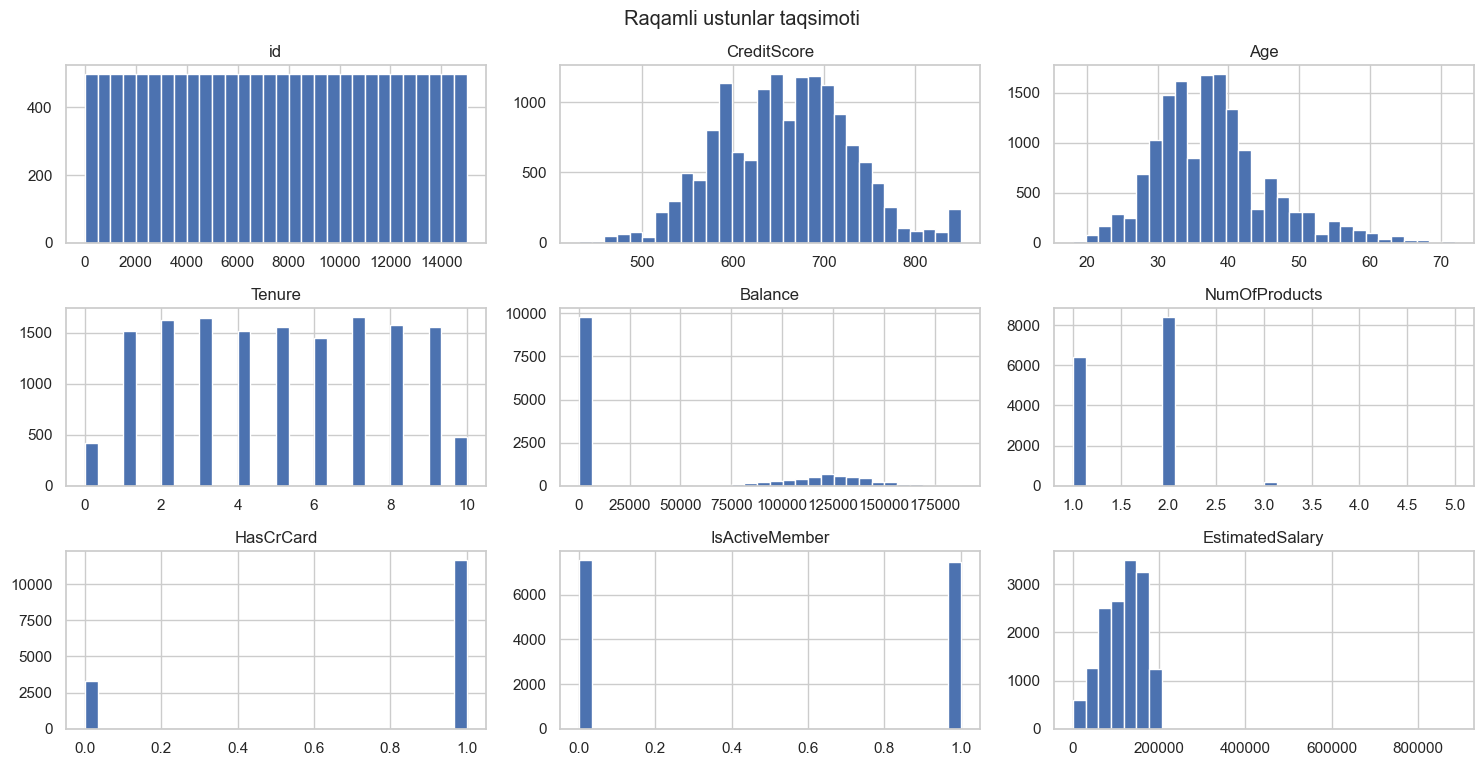

In [ ]:
# Identifying numeric columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
num_cols.remove('Exited') if 'Exited' in num_cols else None

# Histograms
df[num_cols].hist(bins=30, figsize=(15, 10), layout=(len(num_cols) // 3 + 1, 3))
plt.suptitle("Raqamli ustunlar taqsimoti")
plt.tight_layout()
plt.show()

In [ ]:
# Defining categorical columns
cat_cols = df.select_dtypes(include='uint8').columns.tolist()

In [ ]:
# Barplots
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.title(f"{col} distribution by")
    plt.show()

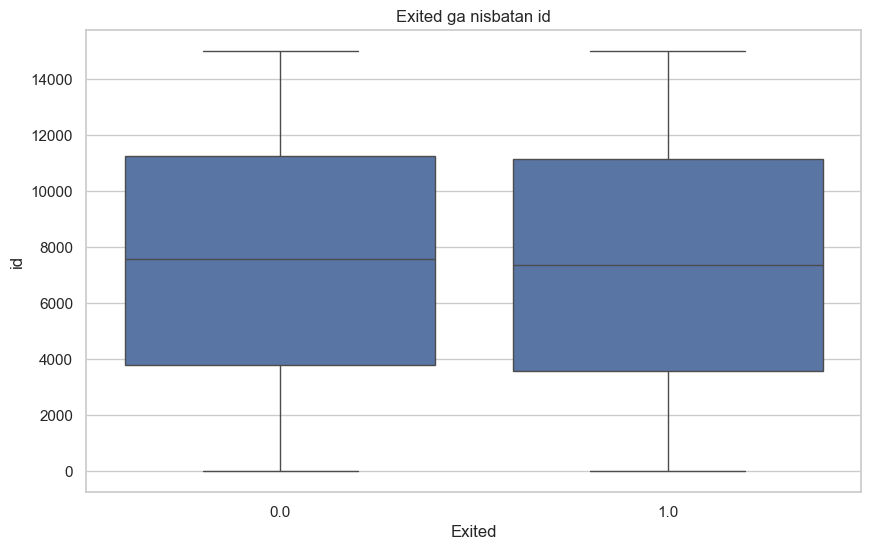

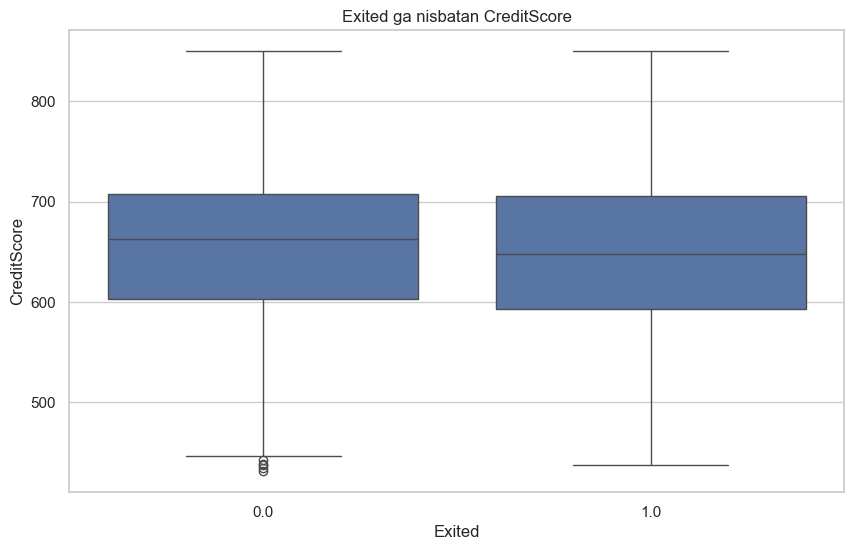

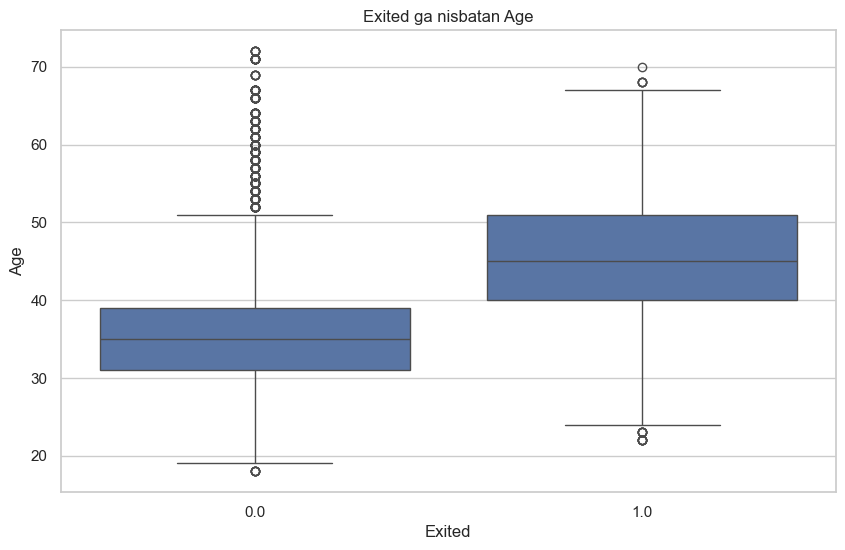

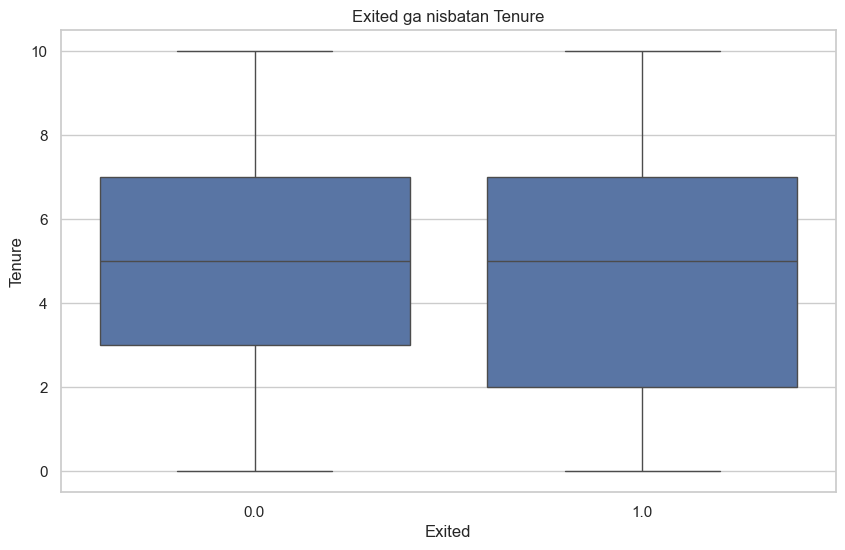

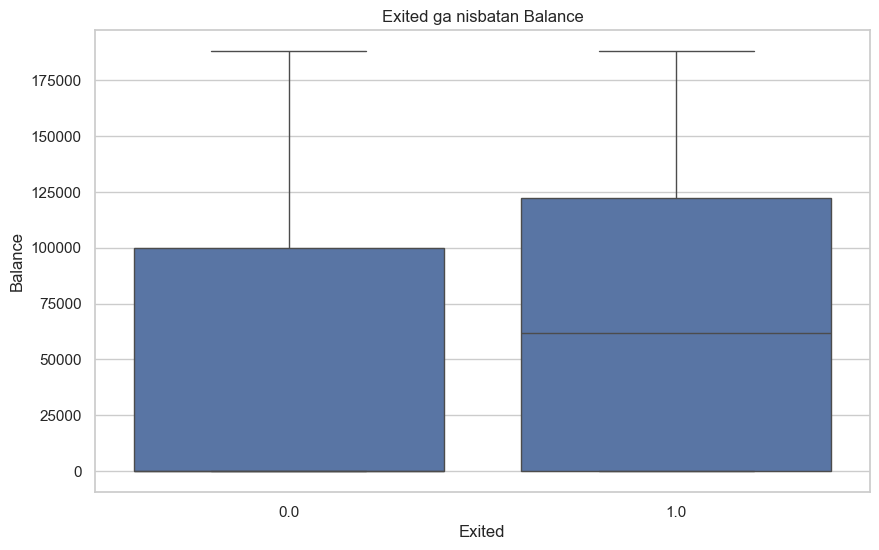

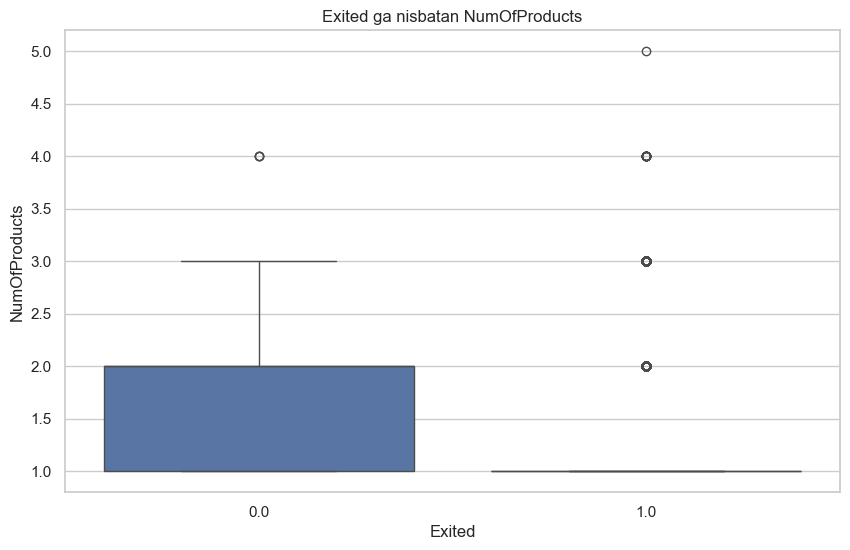

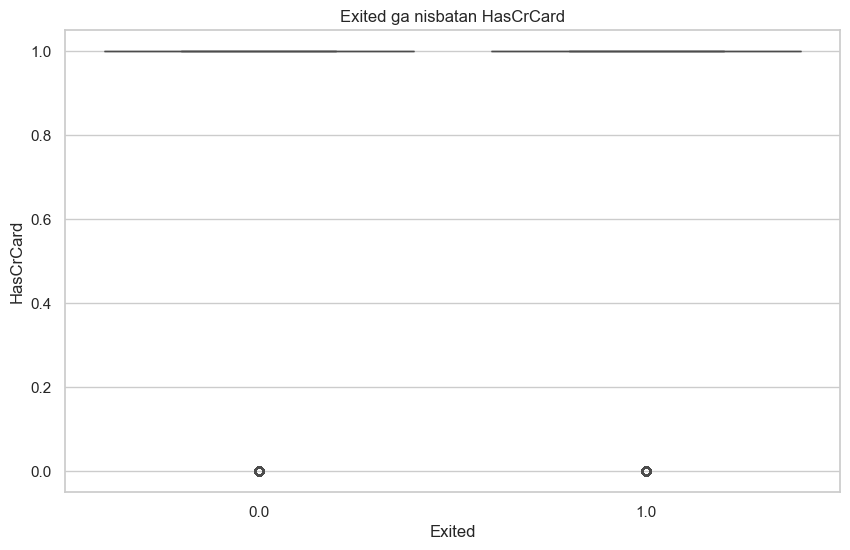

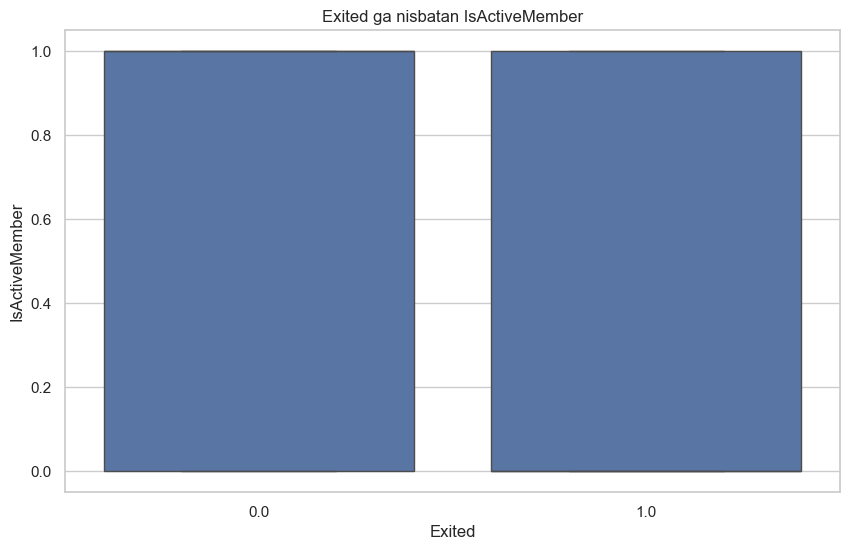

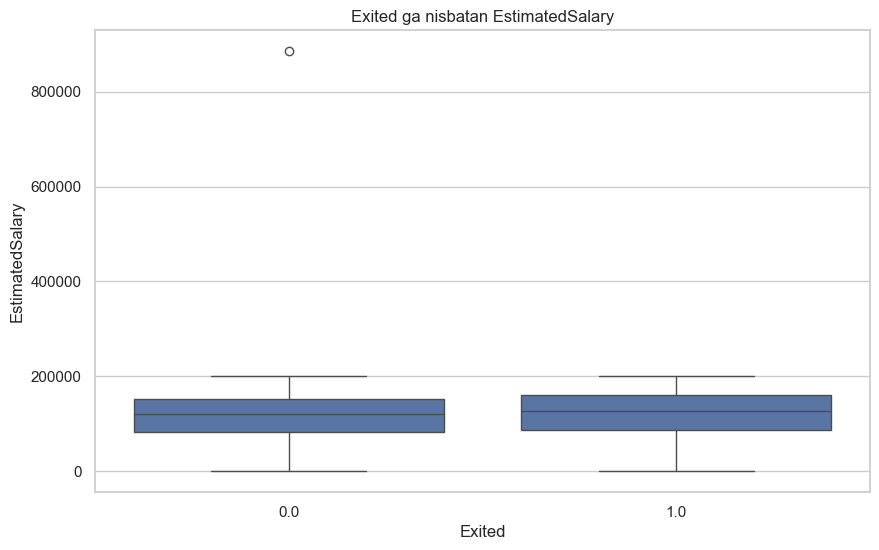

In [ ]:
# Numeric columns related to Target
for col in num_cols:
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f"Regarding Exited {col}")
    plt.show()

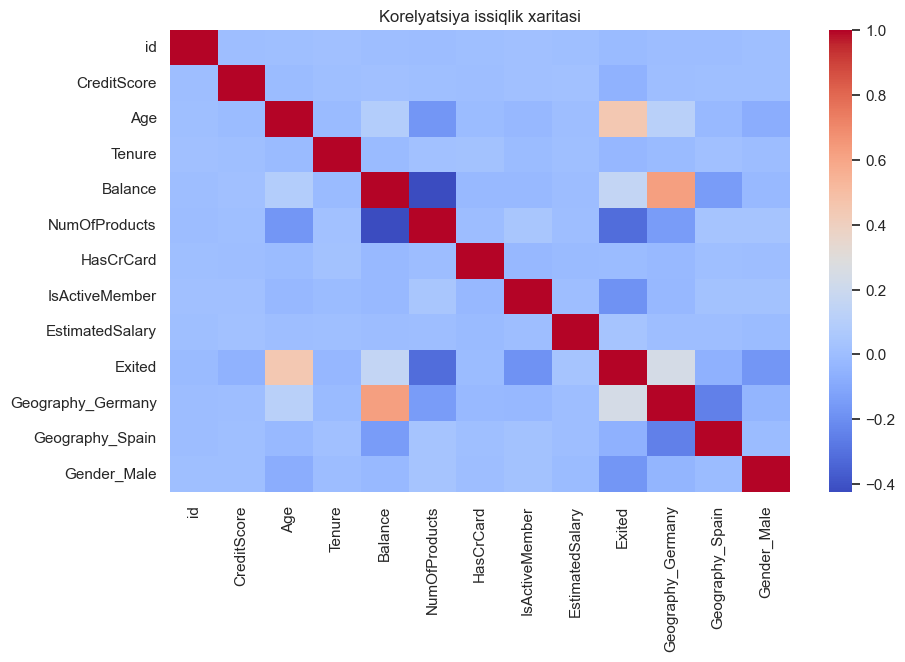

In [ ]:
# Correlation table and heat map
corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Korelyatsiya issiqlik xaritasi")
plt.show()

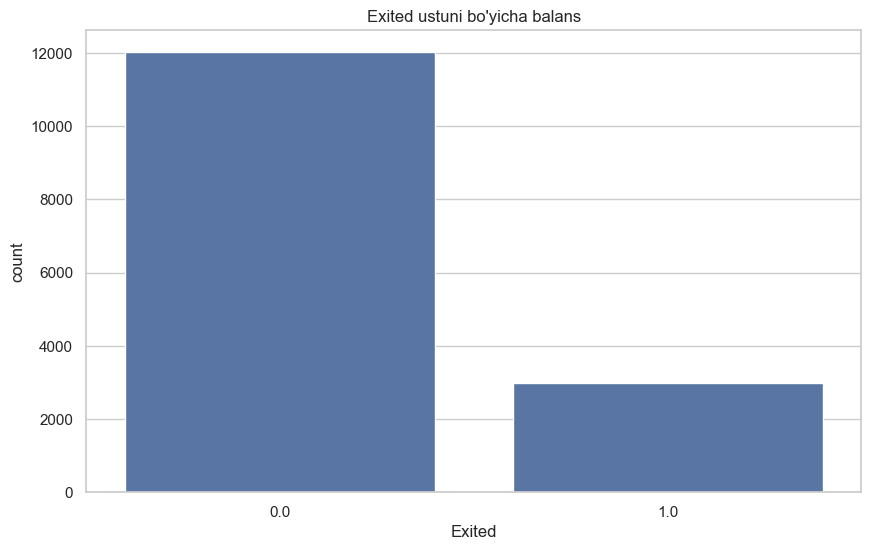

Exited
0.0    0.801533
1.0    0.198467
Name: proportion, dtype: float64

In [ ]:
# Balance on Target (Exited)
sns.countplot(x="Exited", data=df)
plt.title("Balance by Exited column")
plt.show()

df['Exited'].value_counts(normalize=True)